In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import mysql.connector
import seaborn as sns
import os
import numpy as np
db= mysql.connector.connect(host="localhost",
                           username="root",
                           password="12345#",
                           database="ecommerce")
cur = db.cursor()

# list all unique cities where customers are located

In [2]:
querry = """select distinct customer_city from ecommerce.customers"""

cur.execute (querry)
data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# count the number of orders placed in 2017

In [3]:
querry="select count(order_id) from orders where year(order_purchase_timestamp)= 2017"
cur.execute(querry)
data= cur.fetchall()
data[0][0]

45101

# find the total sales per category

In [4]:
querry = '''select upper(products.product_category) category,round(sum(payments.payment_value),2) sales from products join order_items on products.product_id = order_items.product_id  join payments on payments.order_id = order_items.order_id
group by category'''

cur.execute(querry)
data = cur.fetchall()
db = pd.DataFrame(data, columns=["Category","sales"])
db

,Category,sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


# calculate the percentage of orders that were paid in installments

In [7]:
querry = '''select (sum(case 
	when payment_installments>=1 then 1
    else 0
    end))/count(*)*100
from payments;'''

cur.execute(querry)
data = cur.fetchall()
data

[(Decimal('99.9981'),)]

# count the number of customers from each state

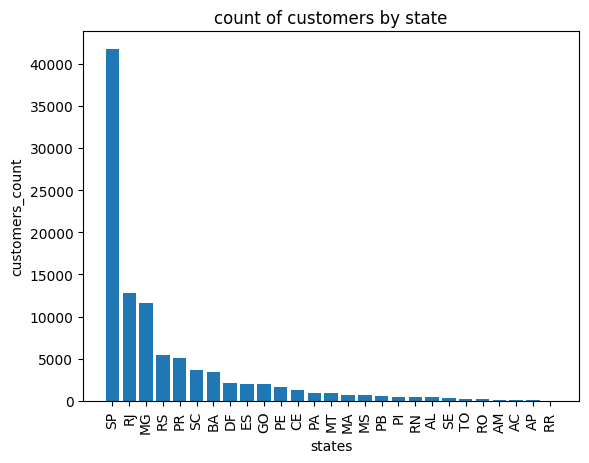

In [8]:
querry = """select customer_state, count(customer_id) from customers group by customer_state"""
cur.execute (querry)
data=cur.fetchall()
db = pd.DataFrame(data,columns=["state","customer_count"])
db = db.sort_values(by = "customer_count", ascending = False)
db
plt.bar(db["state"],db["customer_count"])
plt.xlabel("states")
plt.ylabel("customers_count")
plt.title("count of customers by state")
plt.xticks(rotation = 90)
plt.show()

# calculate the number of orders per month in 2018

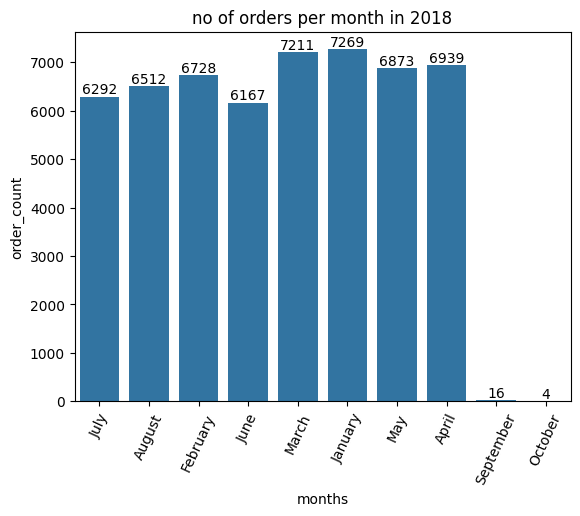

In [11]:
querry = """select monthname(order_purchase_timestamp) month_name, count(order_id) from ecommerce.orders where year(order_purchase_timestamp) = 2018 group by month_name"""
cur.execute(querry)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["months","order_count"])
df
ax=sns.barplot(x=df["months"],y=df["order_count"],data=df)
ax.bar_label(ax.containers[0])
plt.title("no of orders per month in 2018")
plt.xticks(rotation=65)
plt.show()

# find the average number of products per order grouped by customer city 

In [12]:
querry = '''with count_per_order as(select orders.order_id,orders.customer_id, count(order_items.order_id) as oc  
from orders join order_items 
on orders.order_id=order_items.order_id 
group by  orders.order_id,orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) average_orders
from customers
join count_per_order
on customers.customer_id=count_per_order.customer_id
group by customers.customer_city order by average_orders desc '''

cur.execute(querry)
data = cur.fetchall()
df= pd.DataFrame(data,columns=["custome_city","avg_pro_per_order"])
df.head(10)

,custome_city,avg_pro_per_order
0,padre carvalho,7.00
1,celso ramos,6.50
2,datas,6.00
3,candido godoi,6.00
4,matias olimpio,5.00
5,cidelandia,4.00
6,picarra,4.00
7,morro de sao paulo,4.00
8,teixeira soares,4.00
9,curralinho,4.00


# calculate the percentage of total revenue contributed by each product category

In [13]:
querry = '''select upper(products.product_category) category,round((sum(payments.payment_value)/(select sum(payment_value)from payments)*100),2) sales from products join order_items on products.product_id = order_items.product_id  join payments on payments.order_id = order_items.order_id
group by category'''

cur.execute(querry)
data = cur.fetchall()
db = pd.DataFrame(data, columns=["Category","percentage distribution"])
db.head(10)


,Category,percentage distribution
0,PERFUMERY,3.17
1,FURNITURE DECORATION,8.93
2,TELEPHONY,3.04
3,BED TABLE BATH,10.70
4,AUTOMOTIVE,5.32
5,COMPUTER ACCESSORIES,9.90
6,HOUSEWARES,6.84
7,BABIES,3.37
8,TOYS,3.87
9,FURNITURE OFFICE,4.04


# identify the correlation between product price and the number of times a product has been purchased

In [16]:
querry = '''select products.product_category, count(order_items.product_id),round(avg(order_items.price),2) 
from products
join order_items
on products.product_id= order_items.product_id
group by products.product_category'''

cur.execute(querry)
data = cur.fetchall()
df=pd.DataFrame(data,columns=["category","order_count","price"])

array1=df["order_count"]
array2=df["price"]
np.corrcoef([array1,array2])


array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

# calculate the total revenue generated by each seller and rank them by revenue

In [17]:
querry = '''select *, dense_rank() over(order by revenue) as rn from
(SELECT order_items.seller_id, sum(payments.payment_value) revenue from order_items join payments
on payments.order_id=order_items.order_id 
group by order_items.seller_id) as a'''

cur.execute(querry)
data = cur.fetchall()
df= pd.DataFrame(data, columns=["seller id","revenue","rank"])
df

,seller id,revenue,rank
0,cf6f6bc4df3999b9c6440f124fb2f687,12.220000,1
1,77128dec4bec4878c37ab7d6169d6f26,15.220000,2
2,4965a7002cca77301c82d3f91b82e1a9,16.360001,3
3,702835e4b785b67a084280efca355756,18.559999,4
4,ad14615bdd492b01b0d97922e87cb87f,19.209999,5
...,...,...,...
3090,53243585a1d6dc2643021fd1853d8905,284903.080498,3082
3091,1f50f920176fa81dab994f9023523100,290253.420128,3083
3092,4a3ca9315b744ce9f8e9374361493884,301245.269765,3084
3093,1025f0e2d44d7041d6cf58b6550e0bfa,308222.039840,3085


# calculate the moving average of order values for each customer over their order history

In [18]:
querry= """select customer_id, order_purchase_timestamp,payments, avg(payments) over (partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg 
from
(select orders.customer_id, orders.order_purchase_timestamp, payments.payment_value payments
 from orders join payments 
on orders.order_id = payments.order_id)as a"""
cur.execute (querry)
data=cur.fetchall()
df = pd.DataFrame(data, columns=["customer_id","timestamp","payments","moving average"])
df

,customer_id,timestamp,payments,moving average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


# calculate the cumulative sales per month for each year

In [19]:
querry = '''select years,  months, payments , sum(payments) over (order by years,months) cumulatives_sales from
(SELECT year(orders.order_purchase_timestamp) as years ,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payments
from orders join payments 
on orders.order_id = payments.order_id
group by years, months order by years,months) as a'''

cur.execute(querry)
data = cur.fetchall()
df= pd.DataFrame(data,columns=["years","months","payments","cumulative payments"])
df

,years,months,payments,cumulative payments
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


# calculate year-over-year growth rate of total sales

In [20]:
querry="""with a as(
SELECT year(orders.order_purchase_timestamp) as years ,
round(sum(payments.payment_value),2) as payments
from orders join payments 
on orders.order_id = payments.order_id
group by years order by years)
select years, (((payments - lag(payments, 1) over(order by years))/ lag(payments, 1) over(order by years))*100) yoy_percentage_growth from a; 
"""
cur.execute(querry)
data= cur.fetchall()
df= pd.DataFrame(data,columns=["years","YOY % growth"])
df

,years,YOY % growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


# calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [21]:
querry = """with a as(select customers.customer_id, min(orders.order_purchase_timestamp) as first_order
from customers join orders
on customers.customer_id = orders.customer_id 
group by customers.customer_id),
b as(select a.customer_id, count(distinct orders.order_purchase_timestamp)
from a join orders
on a.customer_id= orders.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp <
date_add(first_order, interval 6 month)
group by a.customer_id)

select 100*(count(distinct a.customer_id)/count(distinct b.customer_id))
from a left join b 
on a.customer_id = b.customer_id"""

cur.execute(querry)
data= cur.fetchall()
data

[(None,)]

so we may say that no customers made a second purchase within 6 months of their first purchase, suggesting very low customer retention.

# identify the top 3 customers who spent the most money in each year

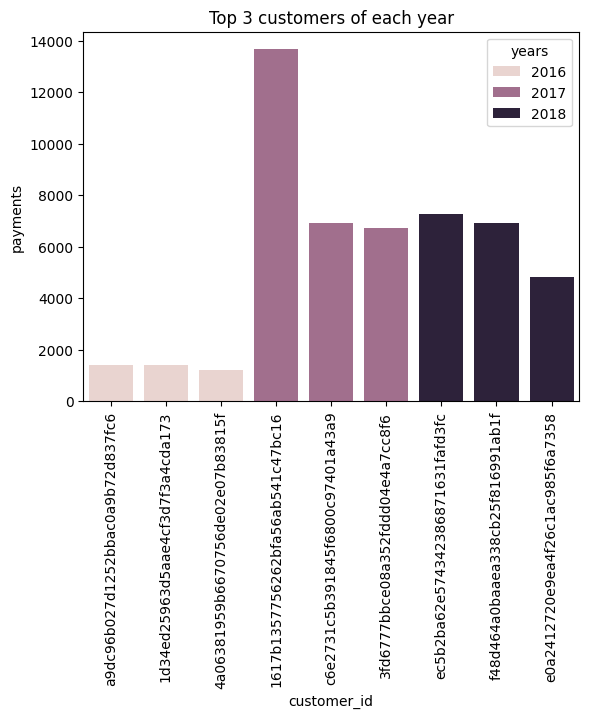

In [22]:
querry="""select years,customer_id , payments, d_rank 
from
(SELECT year(orders.order_purchase_timestamp) years, 
orders.customer_id,
sum(payments.payment_value) payments,
dense_rank() over (partition by year(orders.order_purchase_timestamp) order by sum(payments.payment_value) desc) d_rank
from orders join payments
on orders.order_id = payments.order_id
group by year(orders.order_purchase_timestamp), orders.customer_id) as a
where d_rank<=3"""

cur.execute(querry)
data=cur.fetchall()
df= pd.DataFrame(data,columns=["years","customer_id","payments","ranks"])
sns.barplot(data=df, x = "customer_id",y="payments",hue="years")
plt.title("Top 3 customers of each year")
plt.xticks(rotation=90)
plt.show()